The following section will print the top ten popular categories for restaurants in three major cities and the average review for the corresponding categories.

    Unnamed: 0        city              categories    rating  count
17          17     Phoenix                 Mexican  3.569721    753
15          15     Phoenix               Fast Food  2.726736    677
19          19     Phoenix              Sandwiches  3.512295    610
11          11     Phoenix  American (Traditional)  3.320847    527
12          12     Phoenix      Breakfast & Brunch  3.684783    460
9            9   Charlotte              Sandwiches  3.366150    452
1            1   Charlotte  American (Traditional)  3.322222    451
18          18     Phoenix                   Pizza  3.351230    447
13          13     Phoenix                 Burgers  2.995360    431
5            5   Charlotte               Fast Food  2.706938    418
10          10     Phoenix          American (New)  3.630531    409
21          21  Pittsburgh  American (Traditional)  3.394737    395
28          28  Pittsburgh                   Pizza  3.361757    387
0            0   Charlotte          American (Ne

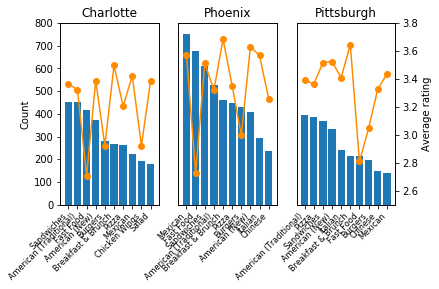

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


city_food = pd.read_csv('yelp_dataset/popCat_city.csv')
city_food = city_food.sort_values(by = 'count', ascending=False)
city_food_C = city_food[city_food['city'] == 'Charlotte']
city_food_P = city_food[city_food['city'] == 'Phoenix']
city_food_Pg = city_food[city_food['city'] == 'Pittsburgh']
print(city_food)

fig, ax = plt.subplots(ncols = 3, nrows= 1)
ax[0].bar(city_food_C['categories'], city_food_C['count'])
ax[0].set_xticklabels(city_food_C['categories'], rotation=45, ha='right', size = 8)
ax[0].set_ylim([0, 800])
ax[0].set_title("Charlotte")
ax[0].set_ylabel("Count")
ax2 = ax[0].twinx()
ax2.set_ylim([2.5, 3.8])
ax2.plot(ax[0].get_xticks(),city_food_C['rating'], linestyle='-', marker='o', color = 'darkorange')
ax2.yaxis.set_visible(False)


ax[1].bar(city_food_P['categories'], city_food_P['count'])
ax[1].set_xticklabels(city_food_P['categories'], rotation=45, ha='right', size = 8)
ax[1].set_ylim([0, 800])
ax[1].set_title("Phoenix")
ax[1].yaxis.set_visible(False)
ax2_1 = ax[1].twinx()
ax2_1.set_ylim([2.5, 3.8])
ax2_1.plot(ax[1].get_xticks(),city_food_P['rating'], linestyle='-', marker='o', color = 'darkorange')
ax2_1.yaxis.set_visible(False)


ax[2].bar(city_food_Pg['categories'], city_food_Pg['count'])
ax[2].set_xticklabels(city_food_Pg['categories'], rotation=45, ha='right', size = 8)
ax[2].set_ylim([0, 800])
ax[2].set_title("Pittsburgh")
ax[2].yaxis.set_visible(False)
ax2_2 = ax[2].twinx()
ax2_2.set_ylim([2.5, 3.8])
ax2_2.plot(ax[2].get_xticks(),city_food_Pg['rating'], linestyle='-', marker='o', color = 'darkorange')
ax2_2.set_ylabel("Average rating")

plt.gcf().subplots_adjust(bottom=0.25)
plt.show()


The follwing section will create a side-by-side boxplot for the number of vetos as 'useful' by the rating and cities.

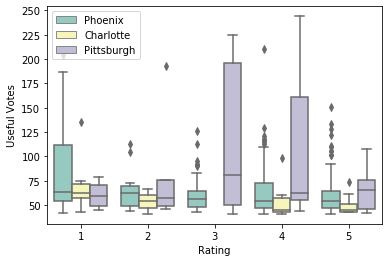

In [4]:
reviews = pd.read_csv('yelp_dataset/restaurant_review.csv', dtype={'review_stars': str})
reviews = reviews.sort_values(by = 'review_stars', ascending=True)
reviews  = reviews [(reviews ['city'] != 'Phoenix Valley') & (reviews ['city'] != 'East Pittsburgh')&
                        (reviews ['city'] != 'charlotte') & (reviews ['city'] != 'PHOENIX') &(reviews['useful'] > 40)]



reviews_C = reviews[reviews['city'] == 'Charlotte']
reviews_P = reviews[reviews['city'] == 'Phoenix']
reviews_Pg = reviews[reviews['city'] == 'Pittsburgh']


ax = sns.boxplot(x="review_stars", y="useful", hue = 'city', data=reviews, palette="Set3")
ax.set(xlabel='Rating', ylabel='Useful Votes')
plt.legend(loc='upper left')
plt.show()


The following section will create a scatterplot of number of votes as 'useful' vs. number of votes as 'funny'

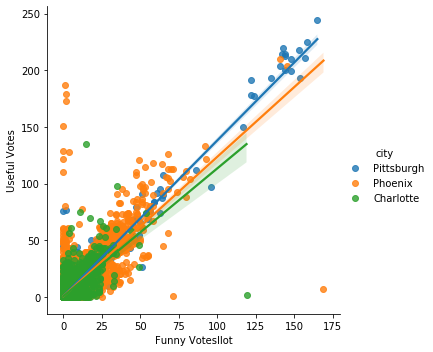

In [6]:
reviews = pd.read_csv('yelp_dataset/restaurant_review.csv')
reviews = reviews.sort_values(by = 'review_stars', ascending=True)
reviews  = reviews [(reviews ['city'] != 'Phoenix Valley') & (reviews ['city'] != 'East Pittsburgh')&
                        (reviews ['city'] != 'charlotte') & (reviews ['city'] != 'PHOENIX') ]


ax = sns.lmplot(x = 'funny', y = 'useful', hue = 'city', data = reviews)
ax.set(xlabel='Funny Votesllot', ylabel='Useful Votes')
plt.show()